In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import networkx as nx
import ete3
import dendropy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [68]:
#define colours
cmap = {
    #Outbreak
    'F2402': '#BEBEBE',
    'F9619': '#7FFFD4',
    'F6041': '#F0FFFF',
    'F9226': '#0000FF',
    'F9413': '#A52A2A',
    'F4957': '#DEB887',
    'F0012': '#7FFF00',
    'F8630': '#FF7F50',
    'F3862': '#FFF8DC',
    'F6245': '#00FFFF',
    'F7578': '#B8860B',
    'F2655': '#BDB76B',
    'F7360': '#8B008B',
    'F0731': '#556B2F',
    'F23315': '#FF8C00',
    'F4984': '#9932CC',
    'F9503': '#8B0000',
    'F0205': '#E9967A',
    'F0038':'#8FBC8F',
    #Source 
    'Diseased': '#FF0000',
    'Cecal': '#0000FF',
    'Environmental': '#00FF00',
    #Phylogroup
    'A':'#483D8B',
    'B1': '#2F4F4F',
    'B2': '#00CED1',
    'C': '#9400D3',
    'cryptic': '#000000',
    'D': '#FF1493',
    'E': '#00BFFF',
    'F': '#1E90FF',
    'G': '#B22222',
    'U': '#000000',
    np.nan: '#FFFFFF'
}

In [69]:
genome_labels = pd.read_table('genome_label.csv', sep=',', index_col=0)

In [70]:
genome_labels = genome_labels.reindex(columns=['Outbreak', 'Source', 'Phylogroup'])

In [71]:
genome_labels.index = genome_labels.index.str.replace('_',' ')

In [72]:
genome_labels

,Outbreak,Source,Phylogroup
Genome,,,
EC 0012 1H1 D,F0012,Diseased,G
EC 0012 2H1 D,F0012,Diseased,G
EC 0012 2L1 D,F0012,Diseased,B2
EC 0012 3S1 D,F0012,Diseased,G
EC 0012 C1 H,F0012,Cecal,A
...,...,...,...
EC E9DN 1 E,NaN,Environmental,A
EC E9DN 2 E,NaN,Environmental,A
EC E9FP 1 E,NaN,Environmental,A


In [73]:
source = {k:v for k, v in cmap.items() if k in genome_labels['Source'].unique()}
outbreak = {k:v for k, v in cmap.items() if k in genome_labels['Outbreak'].unique()}
phylo = {k:v for k, v in cmap.items() if k in genome_labels['Phylogroup'].unique()}


In [74]:
source

{'Diseased': '#FF0000', 'Cecal': '#0000FF', 'Environmental': '#00FF00'}

In [75]:
t = ete3.Tree('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/results/tree_Ecoli/Ecoli_tree_file_gtr_gamma.treefile', format= 1)
t.set_outgroup('EF')
tree = dendropy.Tree.get(data=t.write(), schema='newick')
dm =pd.DataFrame.from_records(tree.phylogenetic_distance_matrix().as_data_table()._data)
um = squareform(dm[dm.index])
ultrametric_link = linkage(um)

In [76]:
genome_colors = genome_labels.copy()

for col in genome_colors.columns:
    genome_colors[col] = [cmap[c] for c in genome_colors[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels.columns):
    legend_keys += sorted(list(genome_labels[col].dropna().unique()))
legend_cmap = {k:v for k, v in cmap.items() if k in legend_keys}

pa_cmap= sns.color_palette(['#f5f5f5', '#021657'])

In [77]:
legend_cmap

{'F2402': '#BEBEBE',
 'F9619': '#7FFFD4',
 'F6041': '#F0FFFF',
 'F9226': '#0000FF',
 'F9413': '#A52A2A',
 'F4957': '#DEB887',
 'F0012': '#7FFF00',
 'F8630': '#FF7F50',
 'F3862': '#FFF8DC',
 'F6245': '#00FFFF',
 'F7578': '#B8860B',
 'F2655': '#BDB76B',
 'F7360': '#8B008B',
 'F0731': '#556B2F',
 'F23315': '#FF8C00',
 'F4984': '#9932CC',
 'F9503': '#8B0000',
 'F0205': '#E9967A',
 'F0038': '#8FBC8F',
 'Diseased': '#FF0000',
 'Cecal': '#0000FF',
 'Environmental': '#00FF00',
 'A': '#483D8B',
 'B1': '#2F4F4F',
 'B2': '#00CED1',
 'C': '#9400D3',
 'cryptic': '#000000',
 'D': '#FF1493',
 'E': '#00BFFF',
 'F': '#1E90FF',
 'G': '#B22222',
 'U': '#000000'}

In [78]:
#AMR heatmap
pa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv', index_col=0)

In [79]:
pa = pa.drop(pa.filter(like='myco').columns, axis=1)

In [80]:
pa

,AAC(3)-IId,AAC(3)-IV,AAC(3)-VIa,AAC(6')-Iid,ANT(3'')-IIa,ANT(3'')-Ib,ANT(4')-IIb,APH(3'')-Ib,APH(3')-IIa,APH(3')-Ia,...,sul1,sul2,tet(A),tet(B),tet(C),tet(H),tet(J),tetR,ugd,All
row_0,,,,,,,,,,,,,,,,,,,,,
EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56
EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,53
EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
EC_0012_C1_H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC_E9DN_1_E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,53
EC_E9DN_2_E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
EC_E9FP_1_E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56


In [81]:
pa.loc['EF'] = pd.Series(dtype=float)

In [82]:
pa3 = pa.fillna(0)

In [83]:
pa4 = pa3.drop('All', axis=1)

In [84]:
pa5 = pa4.drop('All', axis=0)

In [85]:
pa6 = pa5.reset_index()

In [86]:
pa6['row_0'] = pa6['row_0'].str.replace('_',' ')

In [87]:
pa6 = pa6.set_index("row_0")

In [88]:
pa8 = pa6.ge(0.5).astype(int)

In [89]:
col_sums = pa8.sum()
mask = col_sums >= 10
pa9 = pa8.loc[:, mask]

In [90]:
for genome in set(dm.index) - set(pa.index):
    pa.loc[genome]=0

pa2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")

In [91]:
pan1 = pa2.drop(['row_0', 'All'], axis=1)
features = list(pan1.columns)
pan2 = pan1.reset_index(drop=True, inplace=True)

In [92]:
feature = 'AMR'

long_names = []

for f in features:
    if len(f) > 6:
        long_names.append(f)
long_names

['AAC(3)-IId',
 'AAC(3)-IV',
 'AAC(3)-VIa',
 "AAC(6')-Iid",
 "ANT(3'')-IIa",
 "ANT(3'')-Ib",
 "ANT(4')-IIb",
 "APH(3'')-Ib",
 "APH(3')-IIa",
 "APH(3')-Ia",
 'APH(4)-Ia',
 'APH(6)-Ic',
 'APH(6)-Id',
 'Brucella suis mprF',
 'CMY-132',
 'CMY-163',
 'CTX-M-1',
 'Escherichia coli 23S rRNA with mutation conferring resistance to erythromycin and telithromycin',
 'Escherichia coli AcrAB-TolC with AcrR mutation conferring resistance to ciprofloxacin, tetracycline, and ceftazidime',
 'Escherichia coli AcrAB-TolC with MarR mutations conferring resistance to ciprofloxacin and tetracycline',
 'Escherichia coli EF-Tu mutants conferring resistance to Pulvomycin',
 'Escherichia coli GlpT with mutation conferring resistance to fosfomycin',
 'Escherichia coli PtsI with mutation conferring resistance to fosfomycin',
 'Escherichia coli UhpT with mutation conferring resistance to fosfomycin',
 'Escherichia coli acrA',
 'Escherichia coli ampC beta-lactamase',
 'Escherichia coli cyaA with mutation conferring

In [93]:
name_map = {'Escherichia coli 23S rRNA with mutation conferring resistance to erythromycin and telithromycin': '23S rRNA*',
 'Escherichia coli AcrAB-TolC with AcrR mutation conferring resistance to ciprofloxacin, tetracycline, and ceftazidime': 'AcrAB-TolC*AcrR',
 'Escherichia coli AcrAB-TolC with MarR mutations conferring resistance to ciprofloxacin and tetracycline': 'AcrAB-TolC*MarR',
 'Escherichia coli EF-Tu mutants conferring resistance to Pulvomycin': 'EF-Tu*',
 'Escherichia coli GlpT with mutation conferring resistance to fosfomycin': 'GlpT*',
 'Escherichia coli PtsI with mutation conferring resistance to fosfomycin': 'PtsI*',
 'Escherichia coli UhpT with mutation conferring resistance to fosfomycin': 'UhpT*',
 'Escherichia coli acrA': 'acrA',
 'Escherichia coli ampC beta-lactamase': 'ampC',
 'Escherichia coli cyaA with mutation conferring resistance to fosfomycin': 'cyaA',
 'Escherichia coli emrE': 'emrE',
 'Escherichia coli gyrA conferring resistance to fluoroquinolones': 'gyrA*',
 'Escherichia coli mdfA': 'mdfA',
 'Escherichia coli soxR with mutation conferring antibiotic resistance': 'soxR*',
 'Escherichia coli soxS with mutation conferring antibiotic resistance': 'soxS*',
 'Haemophilus influenzae PBP3 conferring resistance to beta-lactam antibiotics': 'PBP3',
 'Klebsiella pneumoniae KpnE': 'KpnE',
 'Klebsiella pneumoniae KpnF': 'KpnF',
 'Klebsiella pneumoniae KpnG': 'KpnG',
 'Klebsiella pneumoniae KpnH': 'KpnH',
 'Streptococcus agalactiae mprF': 'mprF',
 'Streptomyces lividans cmlR': 'cmlR'}

In [94]:
pa9

,AAC(3)-IId,AAC(3)-VIa,ANT(3'')-IIa,ANT(3'')-Ib,APH(3'')-Ib,APH(3')-Ia,APH(6)-Id,AcrE,AcrF,AcrS,...,mdtP,msbA,qacEdelta1,rsmA,sul1,sul2,tet(A),tet(B),tetR,ugd
row_0,,,,,,,,,,,,,,,,,,,,,
EC 0012 1H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2L1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 3S1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 C1 H,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC E9DN 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9DN 2 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9FP 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1


/tmp/ipykernel_1543561/2066770414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


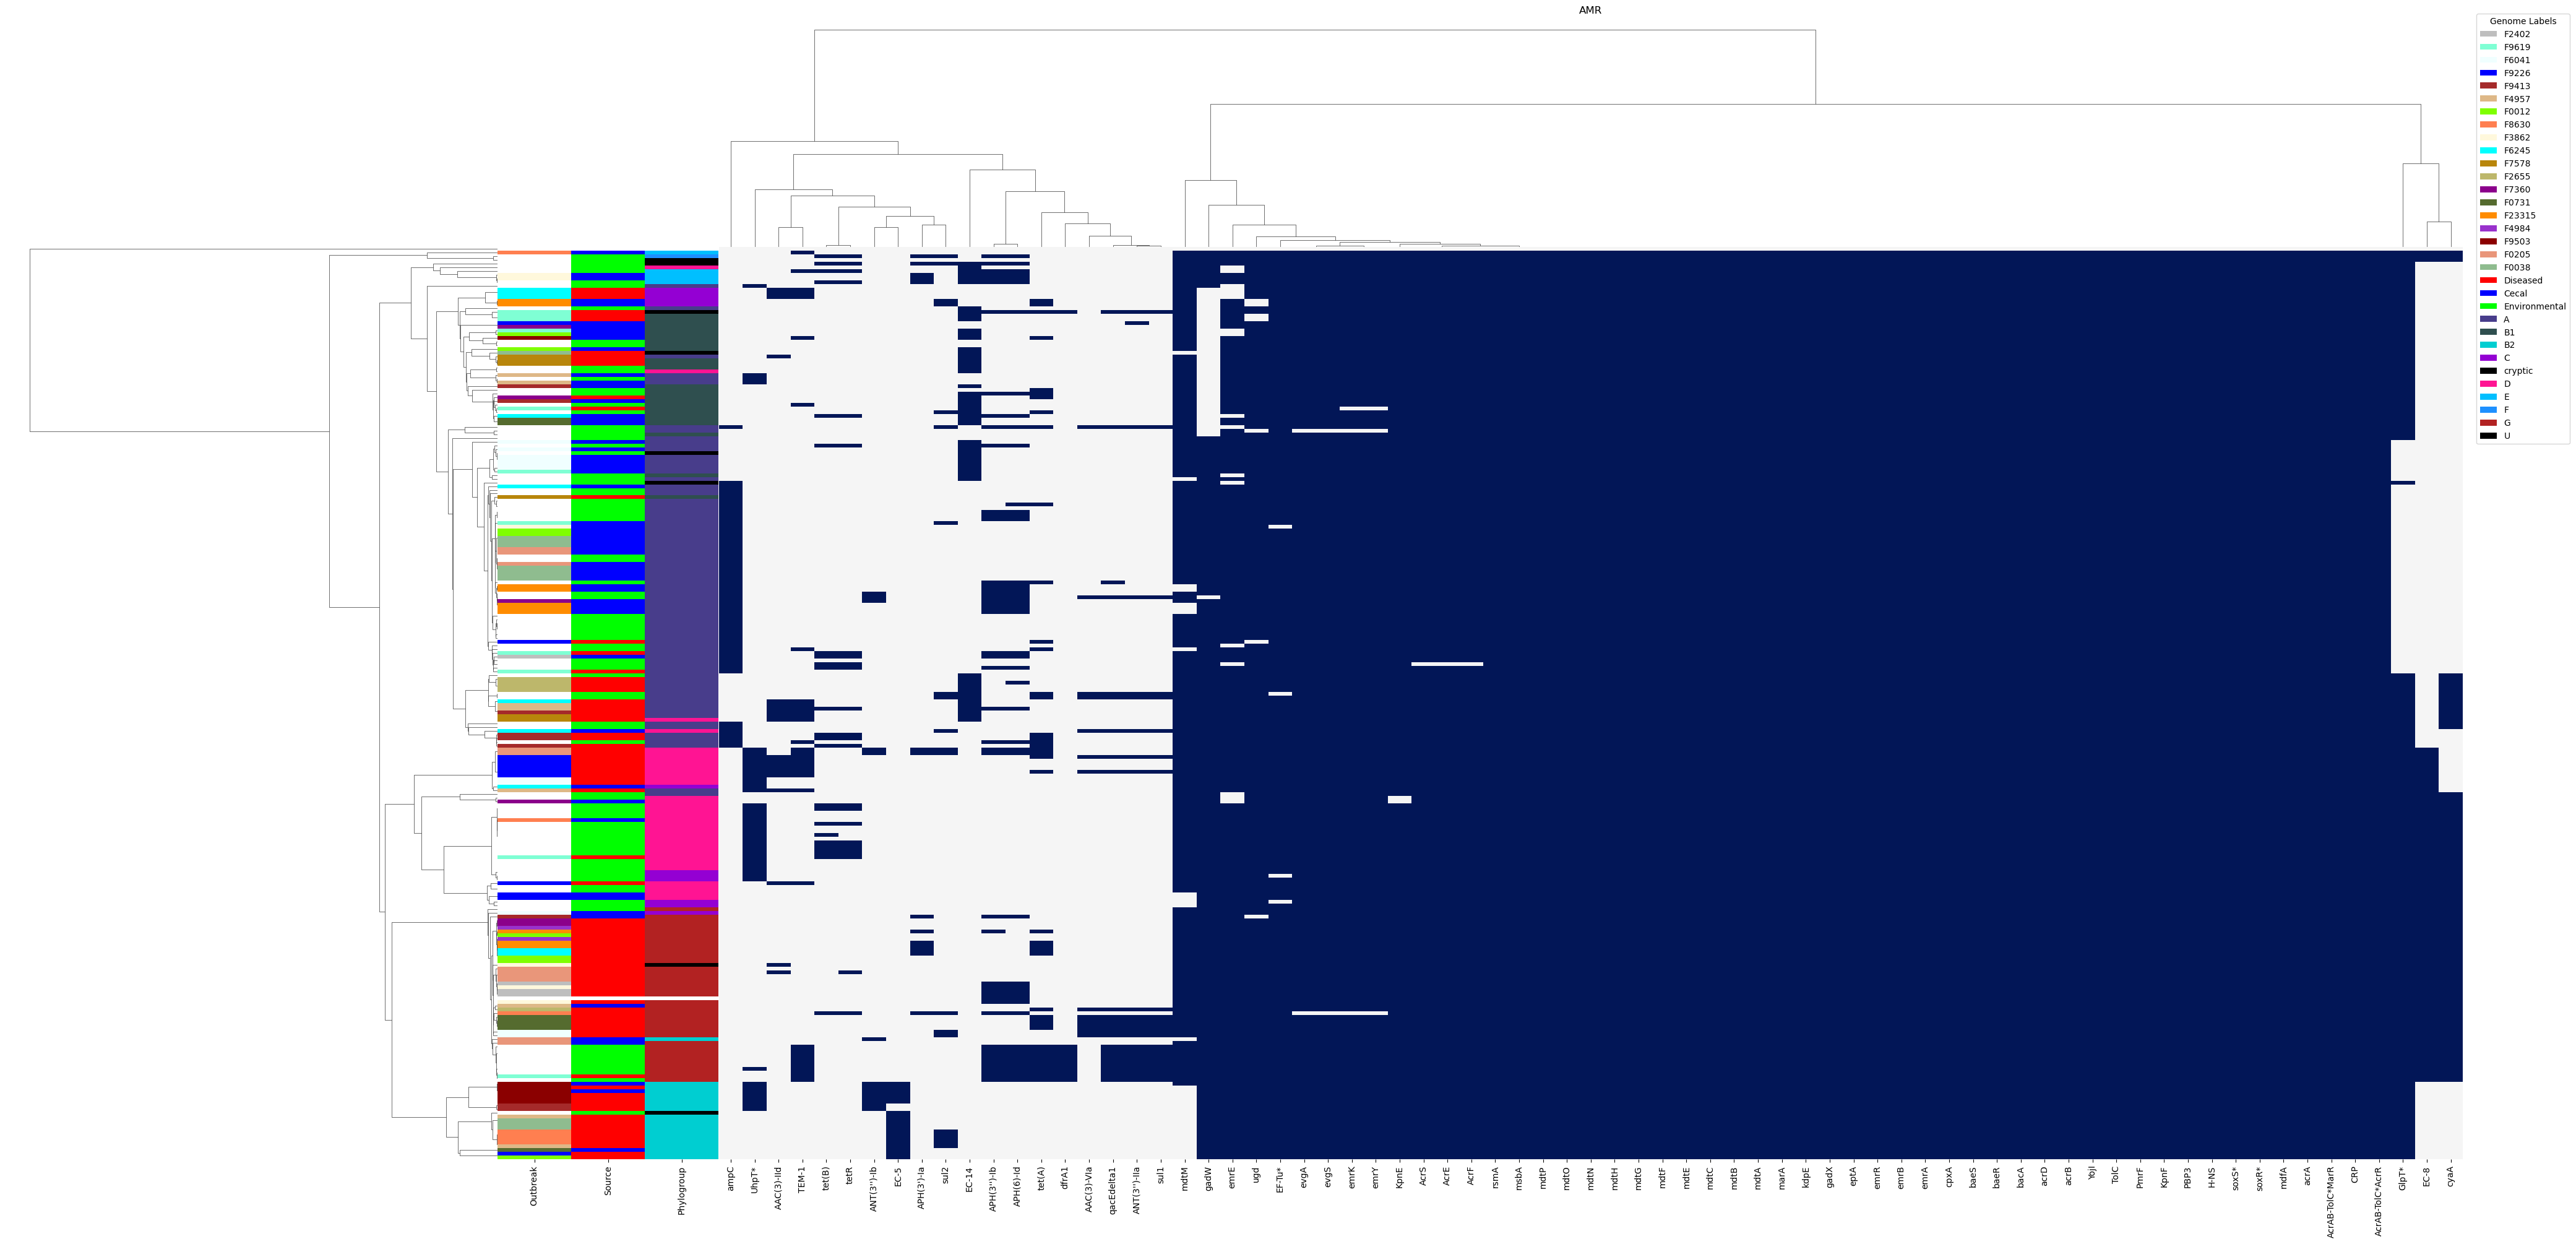

In [95]:
feature = 'AMR'
panel = 'a'
#sel = type_counts[(type_counts['Feature Type']==feature) & (type_counts['Count'] >=5)]
#sel = type_counts[(type_counts['Feature Type']==feature)]
sel_pa = pa9
sel_pa.rename(name_map, axis=1, inplace=True)
col_sums = sel_pa.sum()
sel_pa_high_sum = sel_pa.loc[:, col_sums > 10]


#total = type_counts[type_counts['Feature Type'] == feature].shape[0]
#lt5 = type_counts[(type_counts['Count']<5) & (type_counts['Feature Type']==feature)].shape[0]
#gt5 = total - lt5
#title = "{0} ({1}/{2})".format(feature, gt5, total)
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
g = sns.clustermap(data=sel_pa_high_sum.loc[dm.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=False,
                   figsize=(40,20))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04272023_AMR_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


In [96]:
#AMR heatmap with drug class

In [97]:
# Load drug class data and tweak the labels.
drug_class = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/03272023_AMR_drug_class_best_hit_ARO_groupby_nomyco_multidrug.csv')
len(drug_class['Drug Class'].unique())

rename = []
for f in drug_class['Feature']:
    if f in name_map.keys():
        rename.append(name_map[f])
    else:
        rename.append(f)
drug_class['Feature'] = rename


In [98]:
drug_class

,Drug Class,Feature,Total
0,aminocoumarin antibiotic,Bartonella bacilliformis gyrB conferring resis...,4
1,aminocoumarin antibiotic,Escherichia coli gyrB conferring resistance to...,1
2,aminocoumarin antibiotic,Staphylococcus aureus gyrB conferring resistan...,2
3,aminocoumarin antibiotic,Staphylococcus aureus parE conferring resistan...,1
4,aminocoumarin antibiotic,mdtA,613
...,...,...,...
3491,tetracycline antibiotic,tetB(60),2028
3492,tetracycline antibiotic,tetB(P),1583
3493,tetracycline antibiotic,tetR,935
3494,Multidrug,mdfA,1484


In [100]:
def rename_amr(g):
    if g in name_map.keys():
        return name_map[g]
    return g
def sort_gene_names_by_terminal(gene_names):
    terminals = set( [gene[-1] for gene in gene_names] )
    sets = {k: [] for k in terminals}
    for gene in gene_names:
        sets[gene[-1]].append(gene)

    sorted_genes = []
    for key in sorted(sets.keys(), key=str.casefold):
        for gene in sorted(sets[key]):
            sorted_genes.append(gene)
    return sorted_genes
def sort_gene_names_by_prefix(gene_names):
    prefixes = set(gene[:3] for gene in gene_names)
    sets = {k: [] for k in prefixes}
    for gene in gene_names:
        sets[gene[:3]].append(gene)
    sorted_genes = []
    for key in sorted(sets.keys(), key=str.casefold):
        for gene in sort_gene_names_by_terminal(sets[key]):
            sorted_genes.append(gene)
    return sorted_genes


In [101]:
sel_pa_high_sum.T.to_csv("sel_pa_transposed_to_adddrugclass.csv")

In [168]:
AMR2 = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/04202023_ARETEEColiAMR_result_nomyco.csv")

In [169]:
AMR2 = AMR2[["Isolate_Pathname", "Best_Hit_ARO", "Drug Class"]]

In [176]:
AMR2['Best_Hit_ARO'] = AMR2['Best_Hit_ARO'].replace(name_map)

In [178]:
AMR2

,Best_Hit_ARO,Drug Class
0,gadX,Multi-drug
1,gadW,Multi-drug
2,mdtF,Multi-drug
3,mdtE,Multi-drug
4,CRP,Multi-drug
...,...,...
12819,tet(C),tetracycline antibiotic
12820,TEM-93,Multi-drug
12821,TEM-185,Multi-drug
12933,LRA-13,Multi-drug


In [179]:
AMR2.loc[AMR2['Drug Class'].str.contains(';+'), 'Drug Class'] = 'Multi-drug'

In [180]:
AMR2 = AMR2[["Best_Hit_ARO", "Drug Class"]].drop_duplicates()

In [181]:
unique_strings = AMR2['Drug Class'].unique()
unique_strings

array(['Multi-drug', 'elfamycin antibiotic', 'peptide antibiotic',
       'fluoroquinolone antibiotic', 'aminoglycoside antibiotic',
       'tetracycline antibiotic', 'fosfomycin',
       'aminocoumarin antibiotic', 'macrolide antibiotic',
       'nitroimidazole antibiotic', 'cephalosporin', 'carbapenem',
       'diaminopyrimidine antibiotic', 'sulfonamide antibiotic',
       'disinfecting agents and antiseptics', 'glycopeptide antibiotic',
       'penam', 'cephamycin', 'phenicol antibiotic'], dtype=object)

In [182]:
merged_df = pd.merge(sel_pa_high_sum.T, AMR2, left_index=True, right_on='Best_Hit_ARO', how='left')

In [183]:
merged_df.to_csv("test.csv")

In [184]:
merged_df.set_index("Best_Hit_ARO")

,EC 0012 1H1 D,EC 0012 2H1 D,EC 0012 2L1 D,EC 0012 3S1 D,EC 0012 C1 H,EC 0012 C3 H,EC 0012 C5 H,EC 0012 C7 H,EC 0038 1H1 D,EC 0038 1S2 D,...,EC E8L 1 E,EC E9BE 1 E,EC E9DI 1 E,EC E9DI 2 E,EC E9DN 1 E,EC E9DN 2 E,EC E9FP 1 E,EC E9L 1 E,EF,Drug Class
Best_Hit_ARO,,,,,,,,,,,,,,,,,,,,,
AAC(3)-IId,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aminoglycoside antibiotic
AAC(3)-VIa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aminoglycoside antibiotic
ANT(3'')-IIa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aminoglycoside antibiotic
ANT(3'')-Ib,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aminoglycoside antibiotic
APH(3'')-Ib,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,aminoglycoside antibiotic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sul2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,sulfonamide antibiotic
tet(A),0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,tetracycline antibiotic
tet(B),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,tetracycline antibiotic


In [186]:
merged_df2 = merged_df.set_index("Best_Hit_ARO")

In [191]:
merged_df2.T

Best_Hit_ARO,AAC(3)-IId,AAC(3)-VIa,ANT(3'')-IIa,ANT(3'')-Ib,APH(3'')-Ib,APH(3')-Ia,APH(6)-Id,AcrE,AcrF,AcrS,...,mdtP,msbA,qacEdelta1,rsmA,sul1,sul2,tet(A),tet(B),tetR,ugd
EC 0012 1H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2L1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 3S1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 C1 H,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC E9DN 2 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9FP 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9L 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,1,1,1
EF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


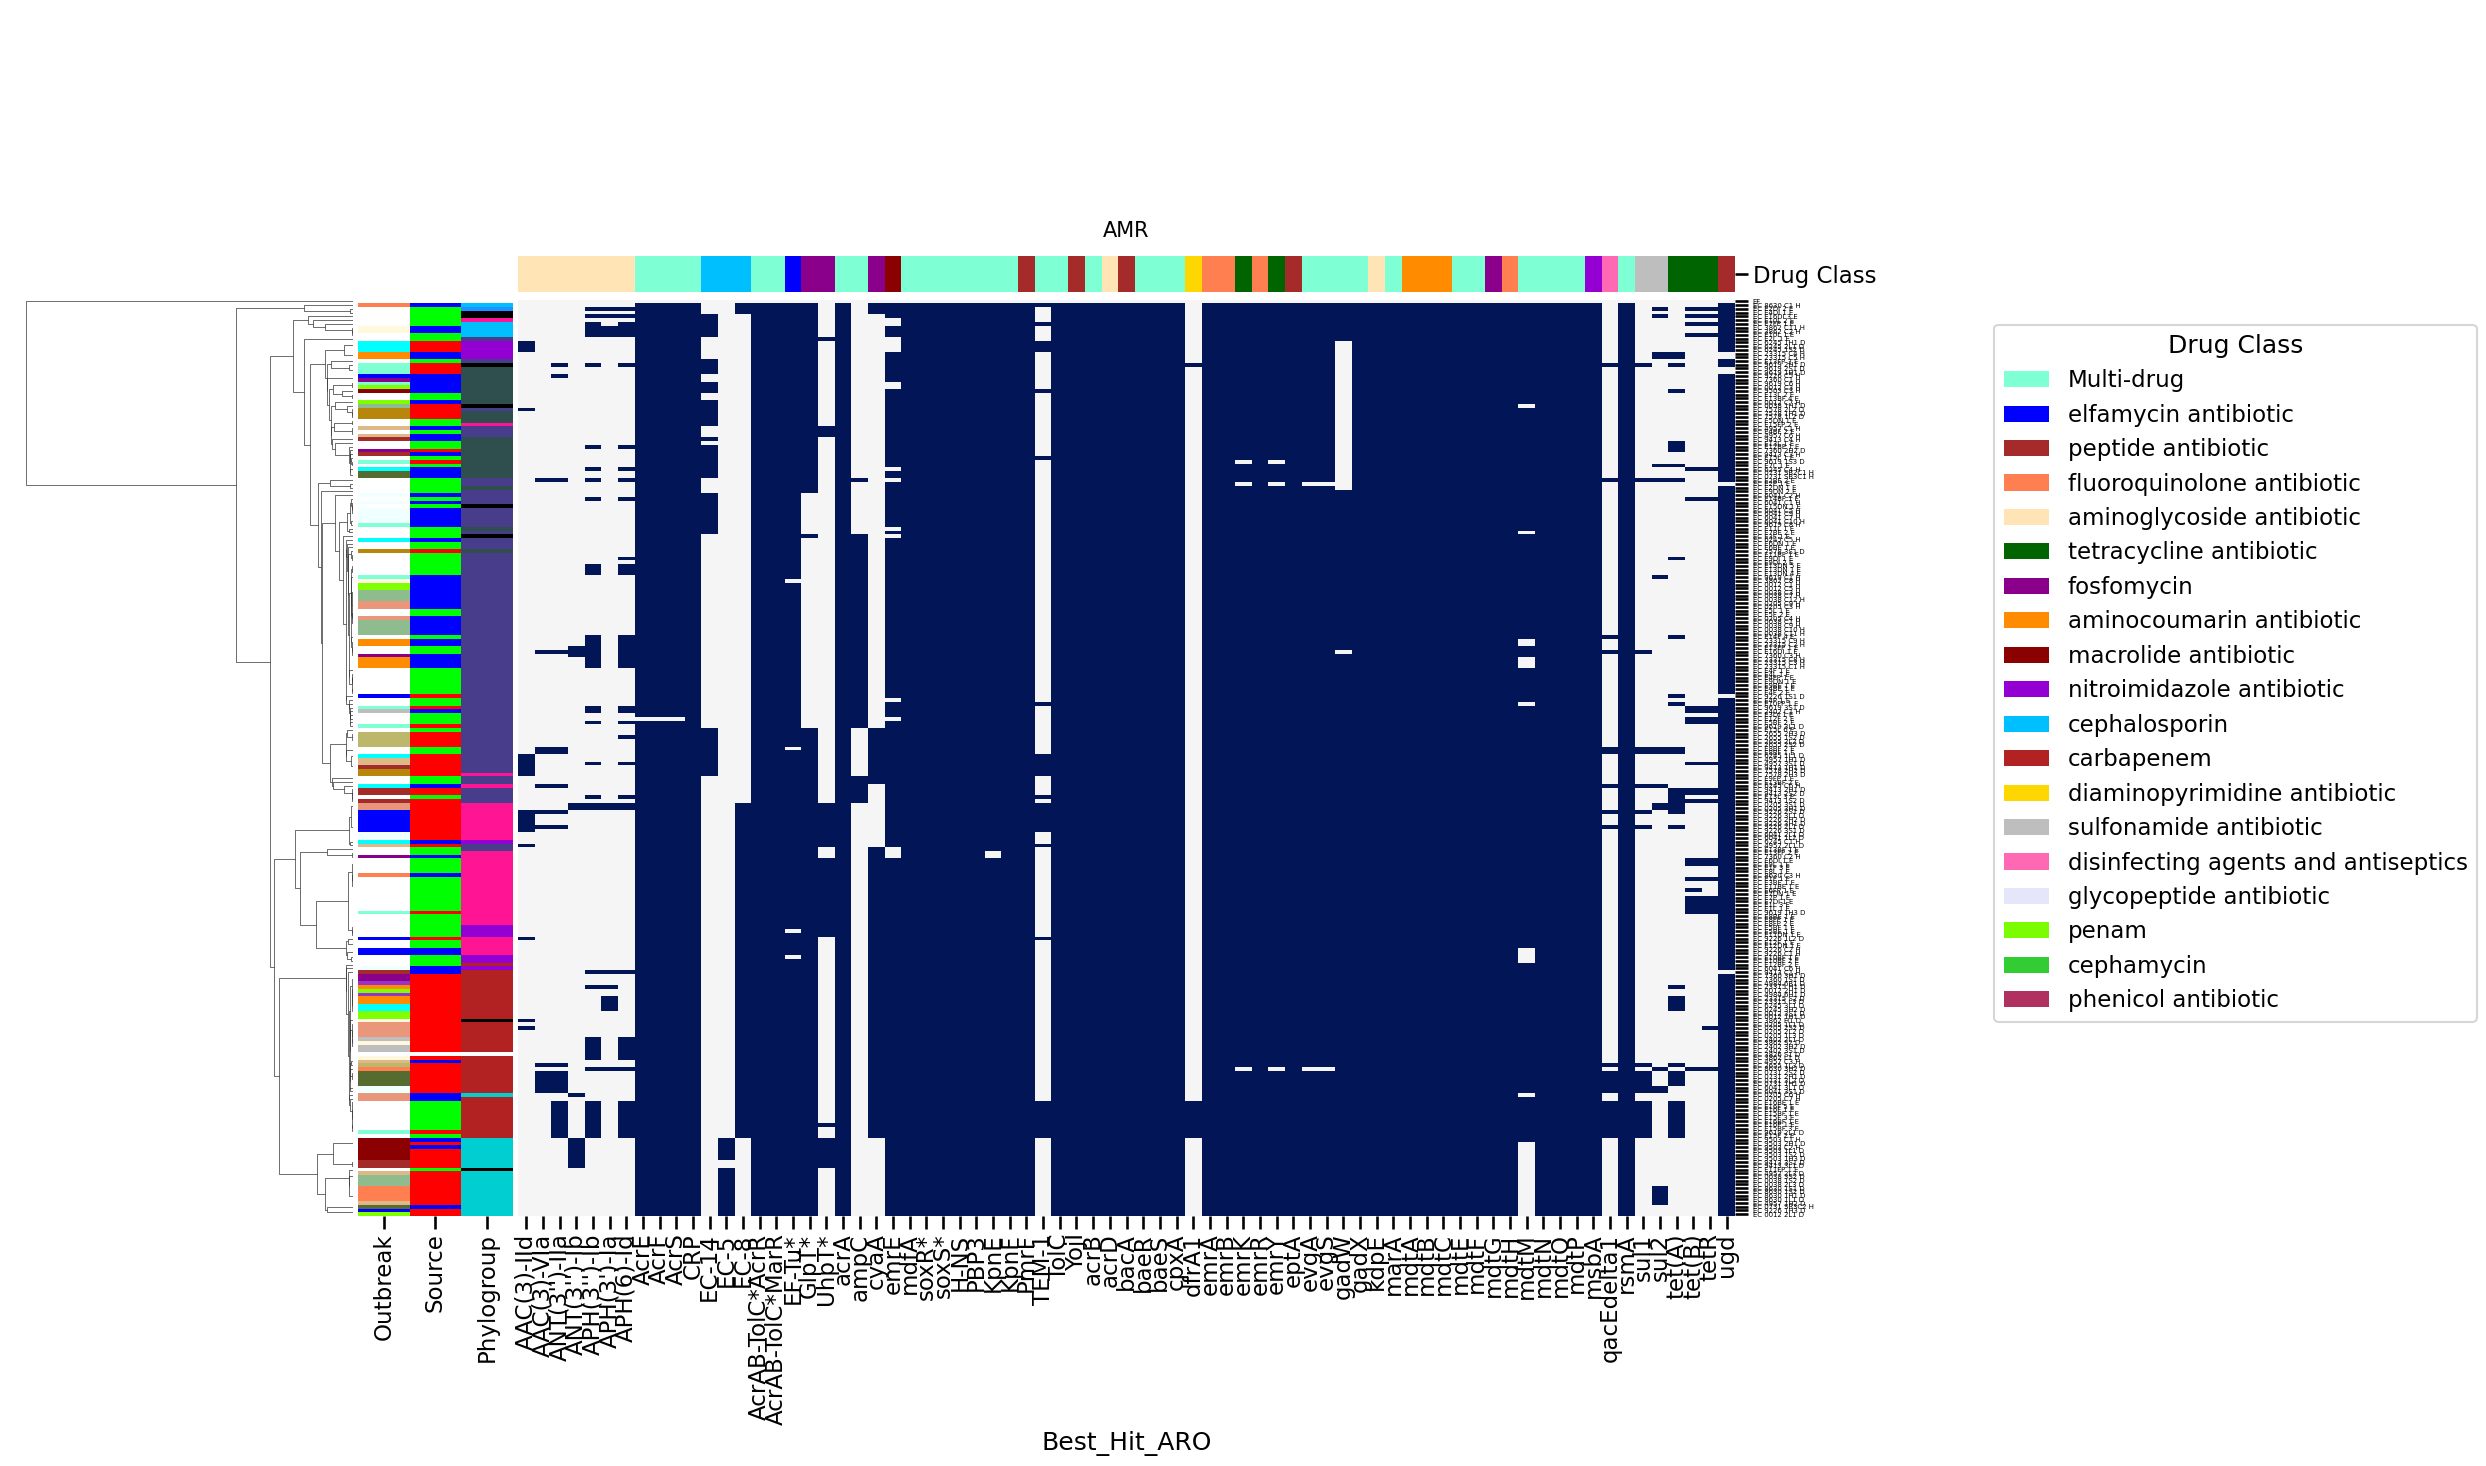

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

drug_cmap = {'Multi-drug':'#7FFFD4', 'elfamycin antibiotic':'#0000FF', 'peptide antibiotic':'#A52A2A',
       'fluoroquinolone antibiotic':'#FF7F50', 'aminoglycoside antibiotic':'#FFE4B5',
       'tetracycline antibiotic':'#006400', 'fosfomycin':'#8B008B',
       'aminocoumarin antibiotic':'#FF8C00', 'macrolide antibiotic':'#8B0000',
       'nitroimidazole antibiotic':'#9400D3', 'cephalosporin':'#00BFFF', 'carbapenem':'#B22222',
       'diaminopyrimidine antibiotic':'#FFD700', 'sulfonamide antibiotic':'#BEBEBE',
       'disinfecting agents and antiseptics':'#FF69B4', 'glycopeptide antibiotic':'#E6E6FA',
       'penam':'#7CFC00', 'cephamycin':'#32CD32', 'phenicol antibiotic':'#B03060'}
col_colours = merged_df2['Drug Class'].map(drug_cmap)
# Rest of your code...

sel_pa_T = merged_df2.T
sel_pa = sel_pa_T.drop('Drug Class')
sel_pa = sel_pa.apply(pd.to_numeric, errors='coerce')

sns.set_context('talk')
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
handles2 = [Patch(facecolor=drug_cmap.get(name, '#FFFFFF')) for name in drug_cmap]
g = sns.clustermap(data=sel_pa.loc[dm.index],
                   row_linkage=ultrametric_link,
                   cbar_pos=None,
                   row_colors=genome_colors,
                   col_colors=col_colours,
                   cmap=pa_cmap,
                   col_cluster=False,
                   xticklabels=1,
                   yticklabels=True,
                   figsize=(20, 15))
g.ax_heatmap.tick_params(axis='y', labelsize=5)
g.ax_heatmap.set_title(title, fontdict={'fontsize': 15}, y=1, pad=45)
#g.ax_col_colors.legend(handles, legend_cmap, title='Genome Labels',
           #bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')


plt.legend(handles2, drug_cmap, title='Drug Class',
           bbox_to_anchor=(1, 0.3), bbox_transform=plt.gcf().transFigure, loc='lower left')


plt.savefig('05242023_amr_clustermap_with_drug_classes.pdf', bbox_inches="tight", dpi=600)



In [198]:
sel_pa

Best_Hit_ARO,AAC(3)-IId,AAC(3)-VIa,ANT(3'')-IIa,ANT(3'')-Ib,APH(3'')-Ib,APH(3')-Ia,APH(6)-Id,AcrE,AcrF,AcrS,...,mdtP,msbA,qacEdelta1,rsmA,sul1,sul2,tet(A),tet(B),tetR,ugd
EC 0012 1H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2L1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 3S1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 C1 H,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC E9DN 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9DN 2 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9FP 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9L 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,1,1,1


In [199]:
sel_pa = sel_pa.apply(pd.to_numeric, errors='coerce')
sel_pa



Best_Hit_ARO,AAC(3)-IId,AAC(3)-VIa,ANT(3'')-IIa,ANT(3'')-Ib,APH(3'')-Ib,APH(3')-Ia,APH(6)-Id,AcrE,AcrF,AcrS,...,mdtP,msbA,qacEdelta1,rsmA,sul1,sul2,tet(A),tet(B),tetR,ugd
EC 0012 1H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2H1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 2L1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 3S1 D,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC 0012 C1 H,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC E9DN 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9DN 2 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9FP 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,1
EC E9L 1 E,0,0,0,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,1,1,1


In [165]:
sel_pa

,AcrE,AcrF,AcrAB-TolC*AcrR,AcrAB-TolC*MarR,AcrS,acrA,acrB,ampC,baeR,baeS,...,PmrF,ugd,YojI,sul1,sul2,emrK,emrY,tet(A),tet(B),tetR
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
sel

,Feature,Feature Type,Count


In [124]:
#Plasmid heatmap

Ppa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_isolates_crosstab_nonovel_mobsuite.csv', index_col=0)
Ppa.loc['EF'] = pd.Series(dtype=float)
Ppa3 = Ppa.fillna(0)
Ppa4 = Ppa3.drop('All', axis=1)
Ppa5 = Ppa4.drop('All', axis=0)
Ppa6 = Ppa5.reset_index()
Ppa6['row_0'] = Ppa6['row_0'].str.replace('_',' ')
Ppa7 = Ppa6.set_index('row_0')
Ppa8 = Ppa7.ge(0.5).astype(int)
for genome in set(dm.index) - set(Ppa8.index):
    Ppa8.loc[genome]=0

col_sums = Ppa8.sum()
mask = col_sums >= 10
Ppa9 = Ppa8.loc[:, mask]


In [125]:
PpaN = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv')
PpaN1 = PpaN.drop(['row_0', 'All'], axis=1)
features = list(PpaN1.columns)
PpaN2 = PpaN1.reset_index(drop=True, inplace=True)

In [126]:
feature = 'Plasmids'

long_names = []

for f in feature:
    if len(f) > 6:
        long_names.append(f)
long_names

[]

/tmp/ipykernel_847028/1386043566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_pa.rename(name_map, axis=1, inplace=True)


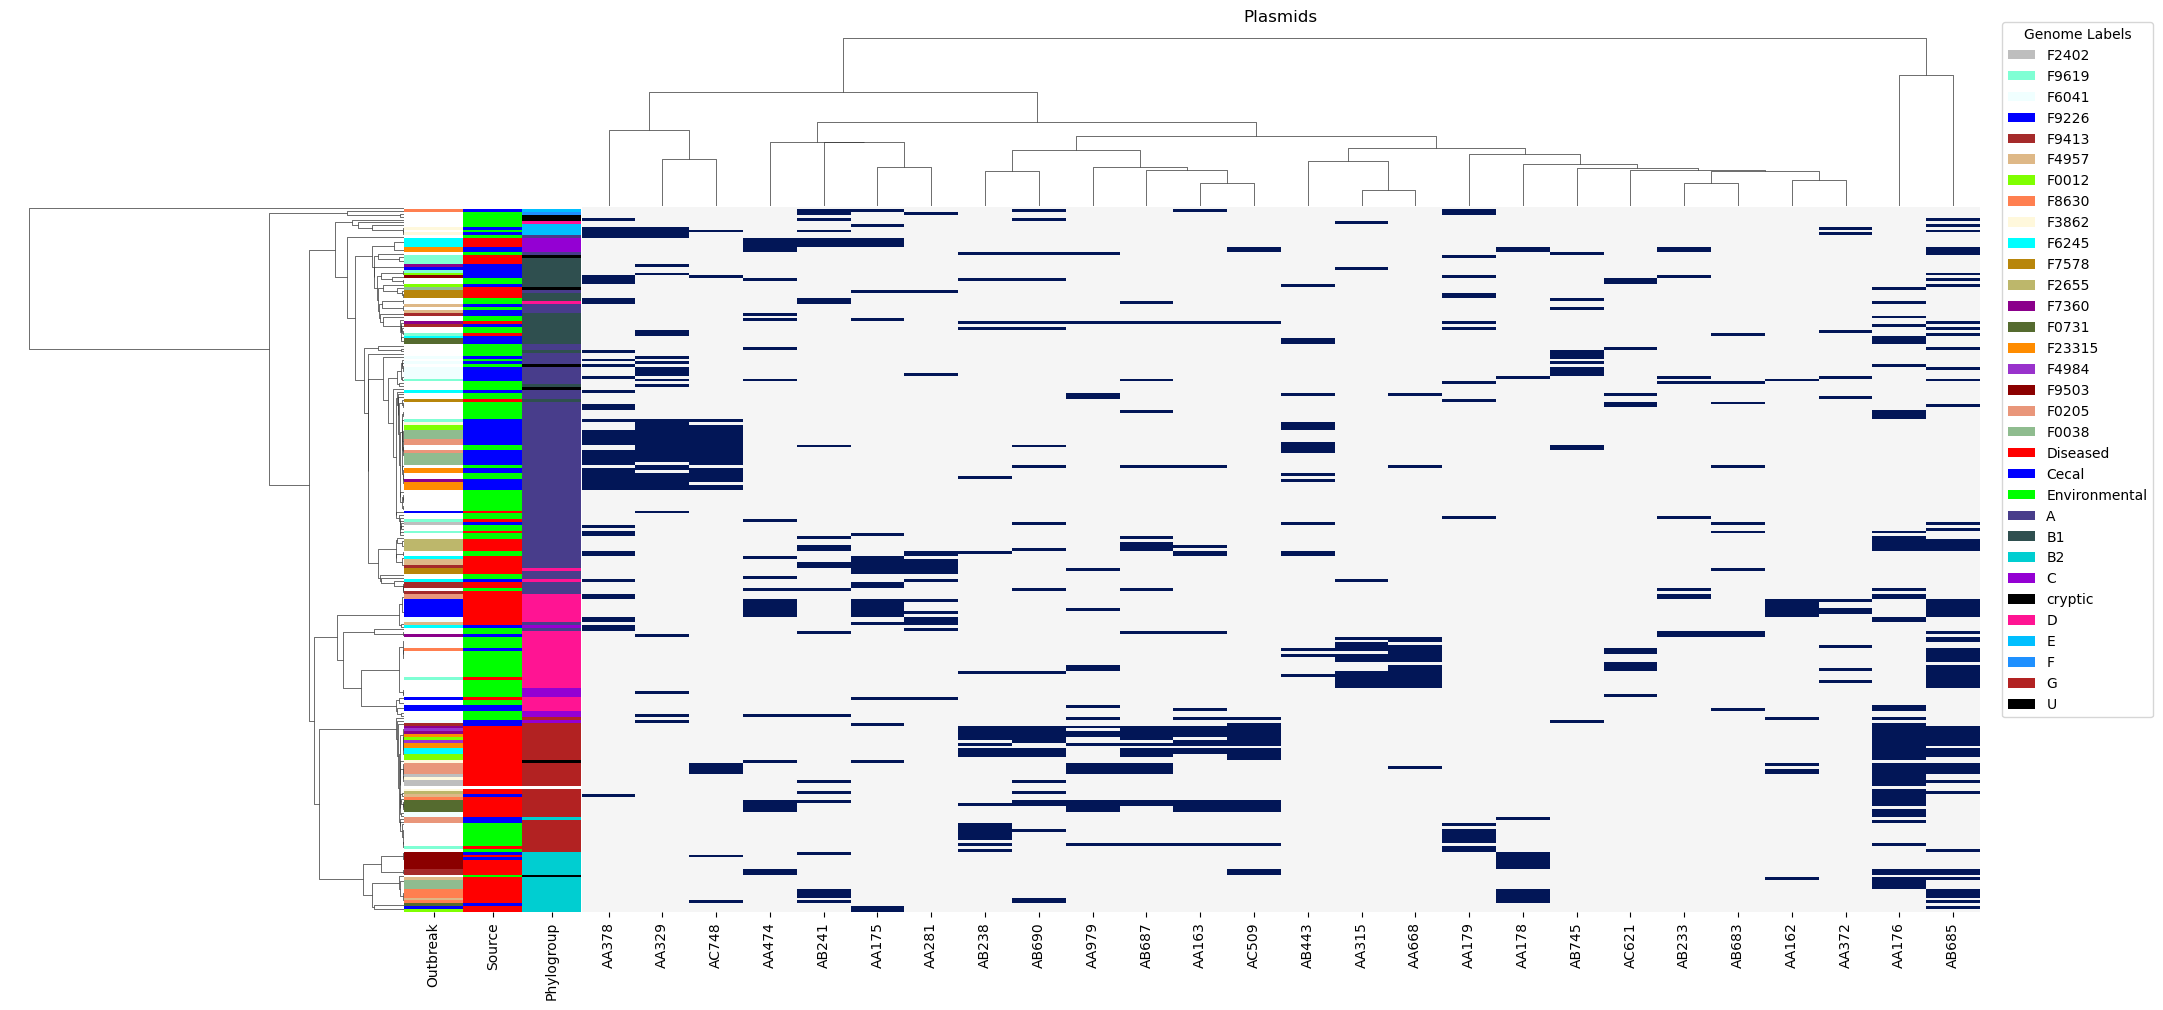

In [127]:
feature = 'Plasmids'
panel = 'a'
#sel = type_counts[(type_counts['Feature Type']==feature) & (type_counts['Count'] >=5)]
#sel = type_counts[(type_counts['Feature Type']==feature)]
sel_pa = Ppa9
sel_pa.rename(name_map, axis=1, inplace=True)

#total = type_counts[type_counts['Feature Type'] == feature].shape[0]
#lt5 = type_counts[(type_counts['Count']<5) & (type_counts['Feature Type']==feature)].shape[0]
#gt5 = total - lt5
#title = "{0} ({1}/{2})".format(feature, gt5, total)
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
g = sns.clustermap(data=sel_pa.loc[dm.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=False,
                   figsize=(20,10))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04032023_Plasmid_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


In [129]:
#VF clustermap

Vpa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_VFDB_filtered80_crosstab_gene_name.csv', index_col=0)
Vpa.loc['EF'] = pd.Series(dtype=float)
Vpa3 = Vpa.fillna(0)
Vpa4 = Vpa3.drop('All', axis=1)
Vpa5 = Vpa4.drop('All', axis=0)
Vpa6 = Vpa5.reset_index()
Vpa6['Isolate_Pathname'] = Vpa6['Isolate_Pathname'].str.replace('_',' ')
Vpa7 = Vpa6.set_index('Isolate_Pathname')
Vpa8 = Vpa7.ge(0.5).astype(int)
for genome in set(dm.index) - set(Vpa8.index):
    Vpa8.loc[genome]=0
col_sums = Vpa8.sum()
mask = col_sums >= 10
Vpa9 = Vpa8.loc[:, mask]

In [130]:
VpaN = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_VFDB_filtered80_crosstab_gene_name.csv')
VpaN1 = VpaN.drop(['Isolate_Pathname', 'All'], axis=1)
features = list(VpaN1.columns)
VpaN2 = VpaN1.reset_index(drop=True, inplace=True)

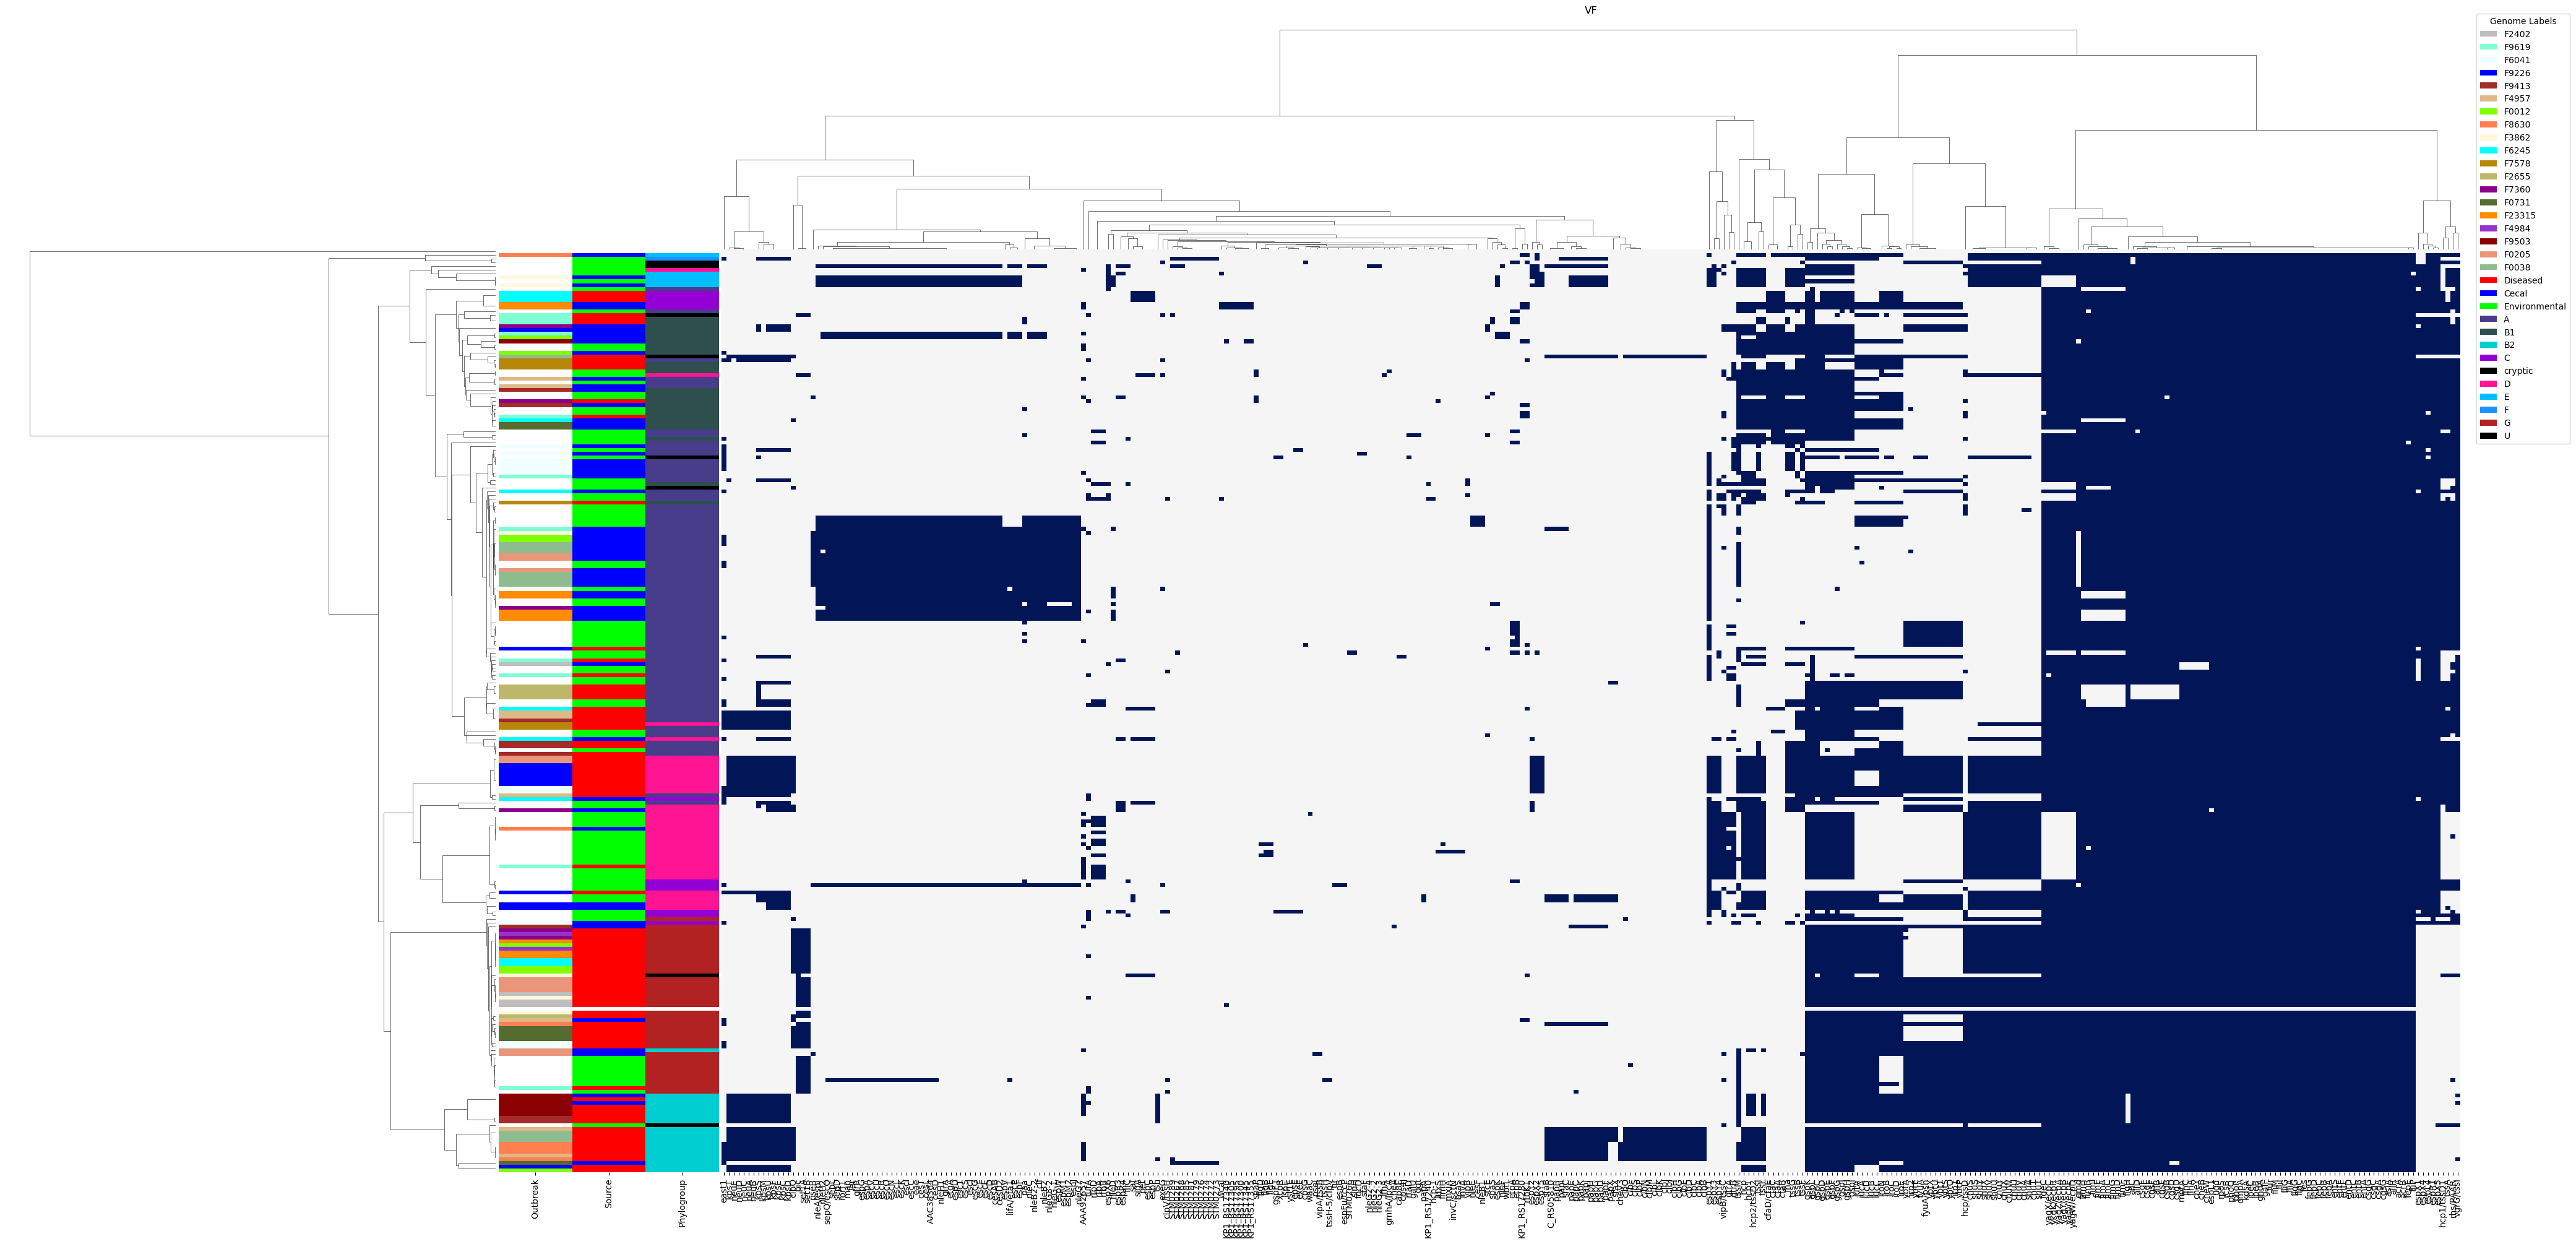

In [132]:
feature = 'VF'
panel = 'a'
#sel = type_counts[(type_counts['Feature Type']==feature) & (type_counts['Count'] >=5)]
#sel = type_counts[(type_counts['Feature Type']==feature)]
sel_pa = Vpa8
sel_pa.rename(name_map, axis=1, inplace=True)

#total = type_counts[type_counts['Feature Type'] == feature].shape[0]
#lt5 = type_counts[(type_counts['Count']<5) & (type_counts['Feature Type']==feature)].shape[0]
#gt5 = total - lt5
#title = "{0} ({1}/{2})".format(feature, gt5, total)
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
g = sns.clustermap(data=sel_pa.loc[dm.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=False,
                   figsize=(40,20))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('04032023_VF_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)


In [312]:
#BACMET heatmap
Bpa = pd.read_csv('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_BACMET_filtered80_crosstab.csv', index_col=0)
Bpa2 = Bpa.append(pd.Series(name='EF'))
Bpa3 = Bpa2.fillna(0)
Bpa4 = Bpa3.drop('All', axis=1)
Bpa5 = Bpa4.drop('All', axis=0)
Bpa6 = Bpa5.reset_index()
Bpa6['row_0'] = Bpa6['row_0'].str.replace('_',' ')
Bpa7 = Bpa6.set_index('row_0')
Bpa8 = Bpa7.ge(0.5).astype(int)
for genome in set(dm.index) - set(Bpa8.index):
    Bpa8.loc[genome]=0

/tmp/ipykernel_846165/503152038.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Bpa2 = Bpa.append(pd.Series(name='EF'))


In [313]:
Bpa9 = Bpa8[Bpa8.columns[Bpa8.sum()>20]]


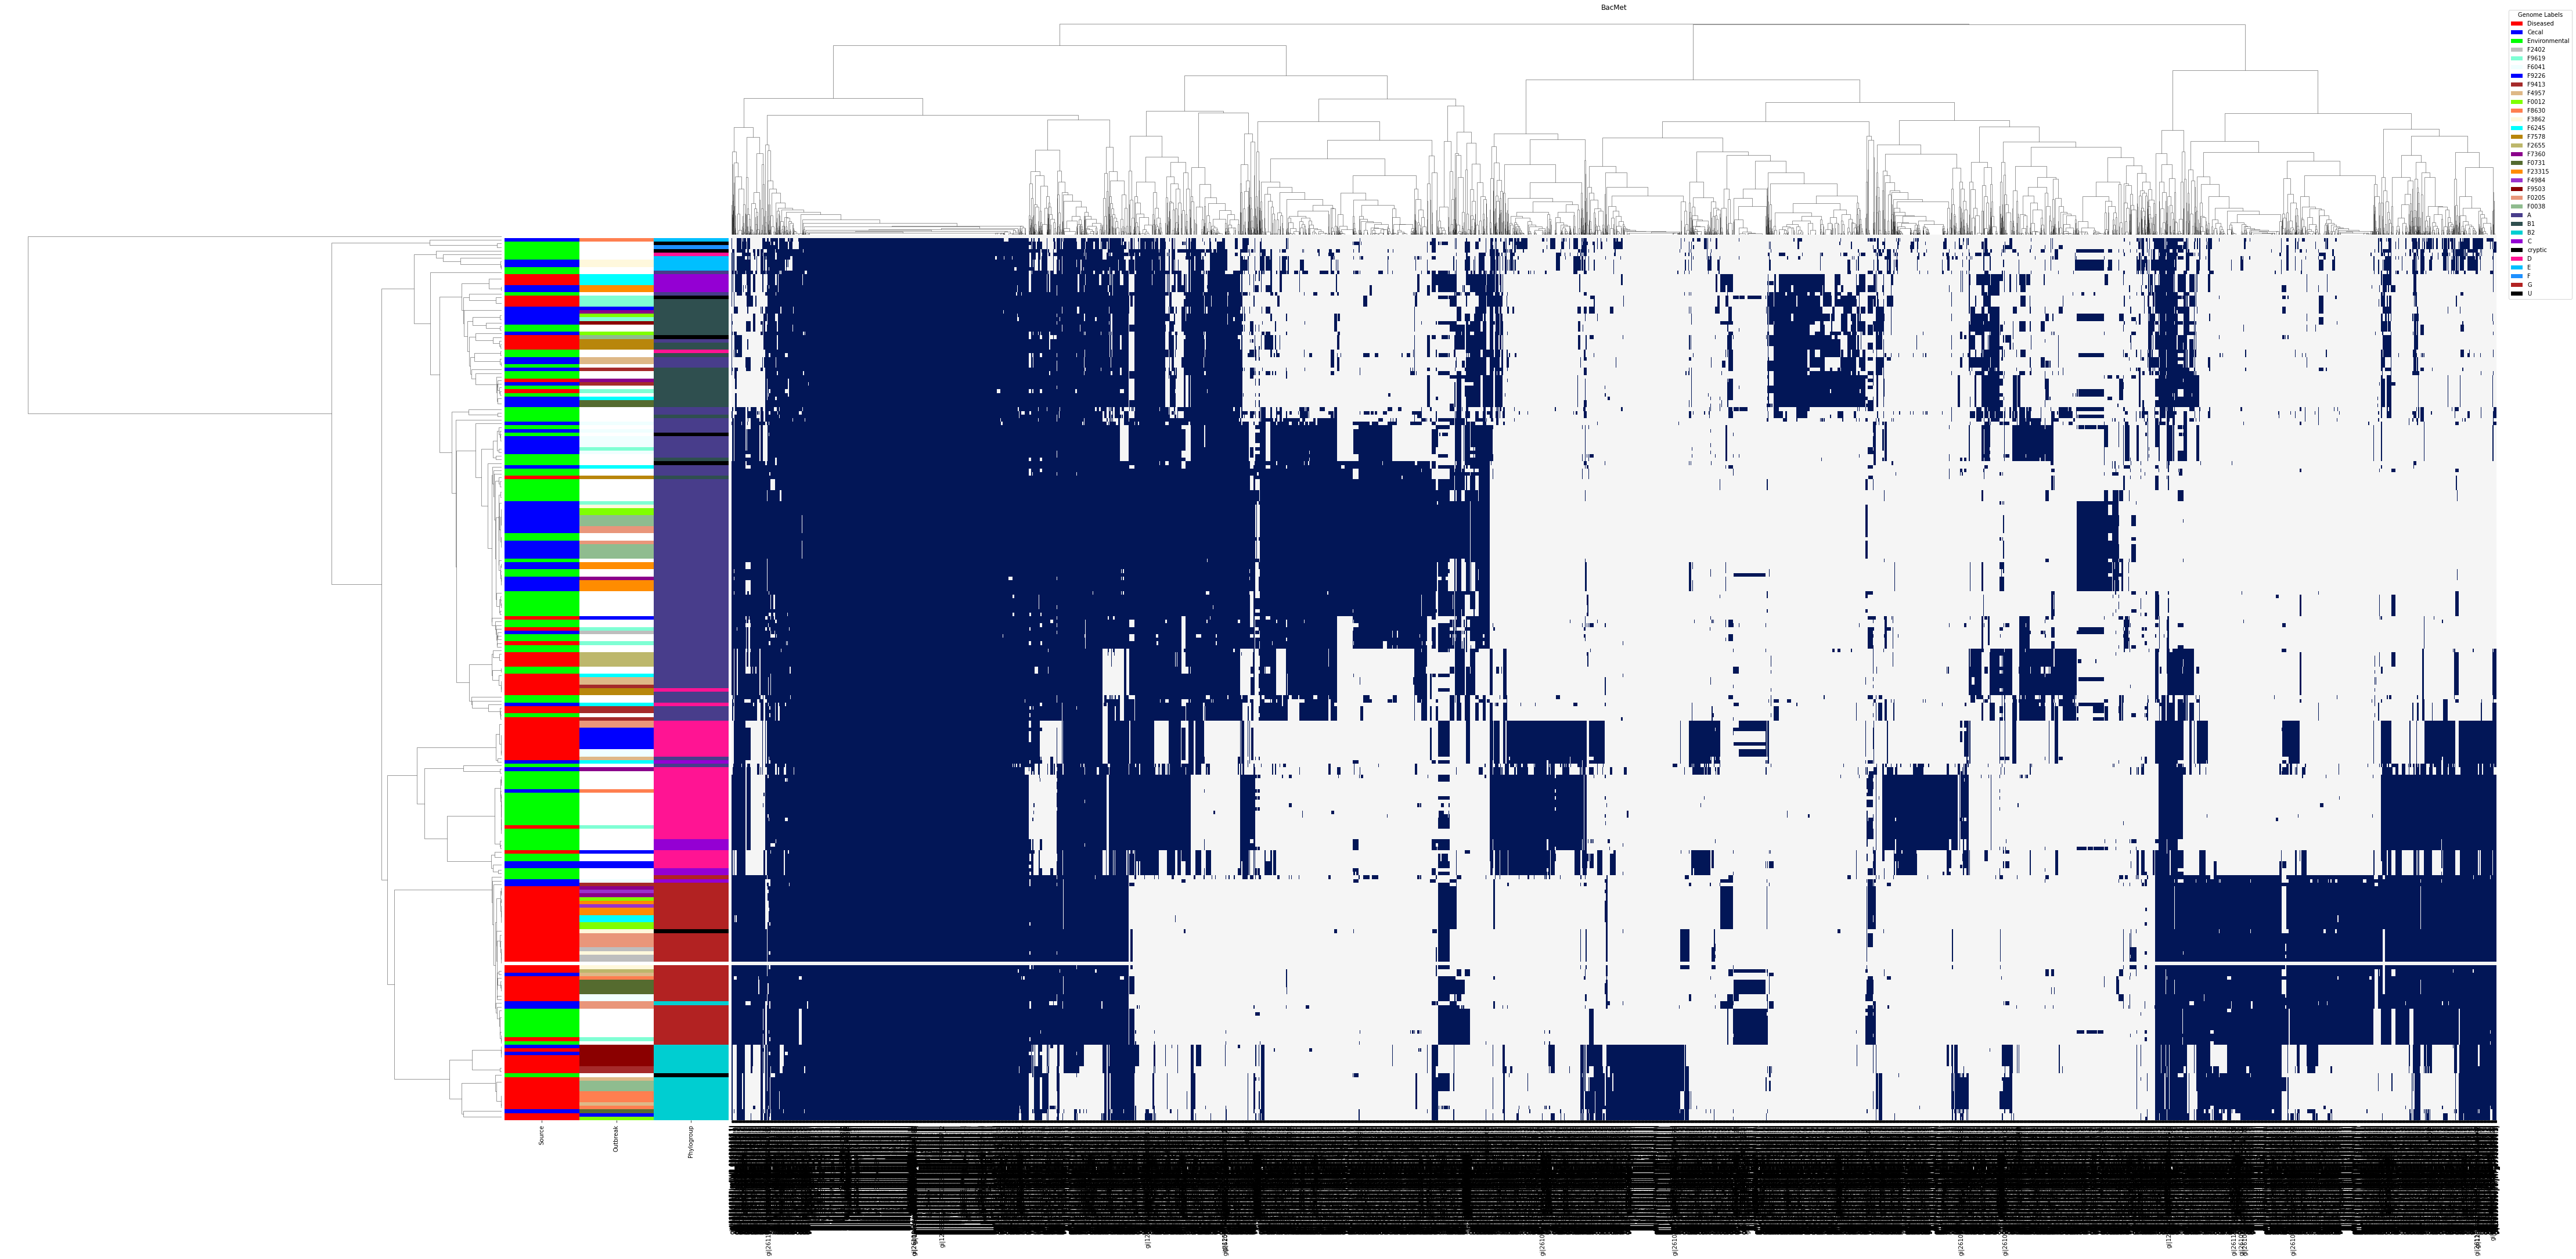

In [319]:
feature = 'BacMet'
panel = 'a'
#sel = type_counts[(type_counts['Feature Type']==feature) & (type_counts['Count'] >=5)]
#sel = type_counts[(type_counts['Feature Type']==feature)]
sel_pa = Bpa9
sel_pa.rename(name_map, axis=1, inplace=True)

#total = type_counts[type_counts['Feature Type'] == feature].shape[0]
#lt5 = type_counts[(type_counts['Count']<5) & (type_counts['Feature Type']==feature)].shape[0]
#gt5 = total - lt5
#title = "{0} ({1}/{2})".format(feature, gt5, total)
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
g = sns.clustermap(data=sel_pa.loc[dm.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=False,
                   figsize=(60,30))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('BACMET_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=600)
